In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
My_data=pd.read_csv("C:/Users/mishr/Documents/EXPOSYS/50_Startups.csv")

In [90]:
My_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [91]:
My_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [92]:
My_data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [93]:
My_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


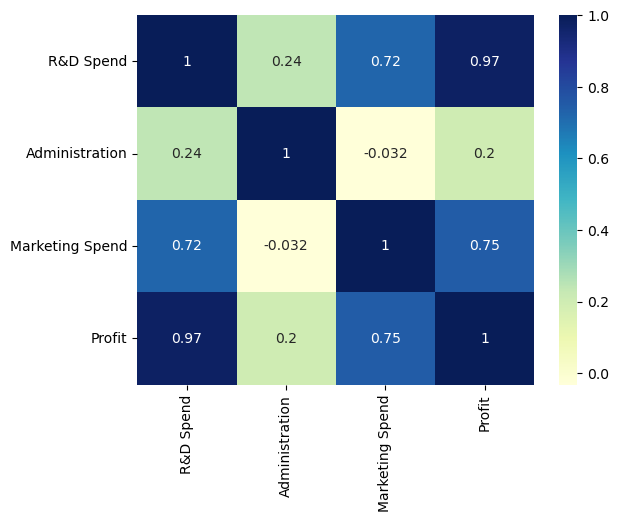

In [94]:
dataplot = sns.heatmap(My_data.corr(), cmap="YlGnBu", annot=True)

In [95]:
features=My_data.drop('Profit',axis=1)
features.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [96]:
Y=My_data['Profit']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,Y,random_state=10,test_size=0.2)

In [98]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [99]:
LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)

LinearRegression()

In [143]:
predictions=LinearReg.predict(x_test)
predictions

array([ 89007.40524486, 109563.17674741,  65520.98039604,  70626.90662787,
        47340.80998763, 116281.95375606, 172996.33916291,  99716.7473907 ,
       159777.958602  , 158417.77783251])

In [101]:
from sklearn.metrics import mean_absolute_error

In [102]:
LinearReg_MAE=mean_absolute_error(y_test,predictions)
LinearReg_MSE=mean_squared_error(y_test,predictions)
LinearReg_RMSE=np.sqrt(LinearReg_MSE)
LinearRegression_R2 =r2_score(y_test,predictions)
print(LinearReg_MAE,'\n',LinearReg_RMSE,'\n',LinearRegression_R2)

2638.343138319632 
 3869.667552020672 
 0.9917459017235681


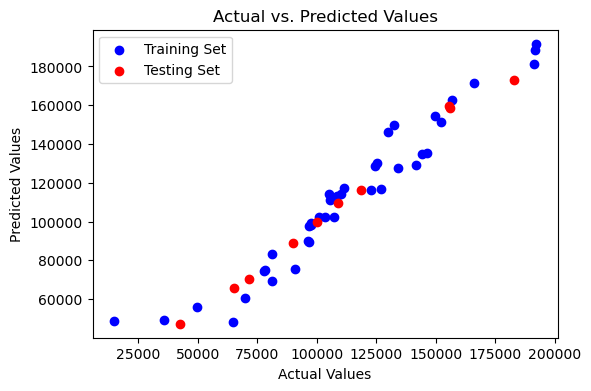

In [120]:
plt.figure(figsize=(6, 4))
# Training set
plt.scatter(y_train, LinearReg.predict(x_train), color='blue', label='Training Set')
# Testing set
plt.scatter(y_test, predictions, color='red', label='Testing Set')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [103]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [104]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [144]:
y_pred=model.predict(x_test)
y_pred

array([ 94672.6077, 108334.3877,  77455.0305,  78299.6665,  35446.4989,
       110806.1875, 171534.5768,  98325.1862, 147090.0654, 148493.2542])

In [106]:
RandomForest_MAE=mean_absolute_error(y_test,y_pred)
RandomForest_MSE=mean_squared_error(y_test,y_pred)
RandomForest_RMSE=np.sqrt(RandomForest_MSE)
RandomForest_R2 =r2_score(y_test,y_pred)
print(RandomForest_MAE,'\n',RandomForest_RMSE,'\n',RandomForest_R2)

6823.162800000059 
 7702.995256123451 
 0.967292934206786


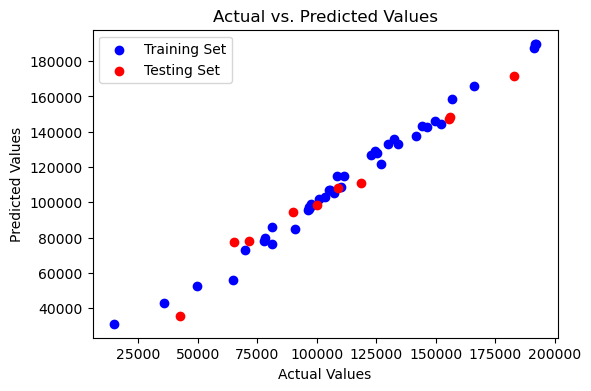

In [119]:
plt.figure(figsize=(6, 4))
# Training set
plt.scatter(y_train, model.predict(x_train), color='blue', label='Training Set')
# Testing set
plt.scatter(y_test, y_pred, color='red', label='Testing Set')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [118]:
#Support Vector Regression
from sklearn.svm import SVR

In [108]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [145]:
prediction = regressor.predict(x_test)
prediction

array([107981.45078772, 107990.66478059, 107976.26903669, 107977.10123476,
       107977.14799325, 107990.93050285, 107993.55923186, 107975.95802133,
       107993.58039373, 107980.75673865])

In [110]:
SupportVector_MAE=mean_absolute_error(y_test,prediction)
SupportVector_MSE=mean_squared_error(y_test,prediction)
SupportVector_RMSE=np.sqrt(SupportVector_MSE)
SupportVector_R2 =r2_score(y_test,prediction)
print(SupportVector_MAE,'\n',SupportVector_RMSE,'\n',SupportVector_R2)

35277.827542607796 
 42602.77159552575 
 -0.0004560879871400303


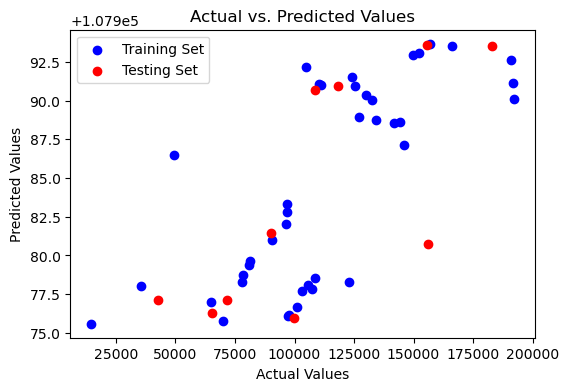

In [117]:
plt.figure(figsize=(6, 4))
# Training set
plt.scatter(y_train, regressor.predict(x_train), color='blue', label='Training Set')
# Testing set
plt.scatter(y_test, prediction, color='red', label='Testing Set')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [127]:
#K-Nearest Neighbour Regressor
from sklearn.neighbors import KNeighborsRegressor

In [128]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [146]:
pred = knn_regressor.predict(x_test)
pred

array([ 86658.416, 119659.094,  73914.232,  85365.12 ,  56493.542,
       119659.094, 162205.964, 101810.784, 132584.404, 105195.388])

In [131]:
knn_MAE=mean_absolute_error(y_test,pred)
knn_MSE=mean_squared_error(y_test,pred)
knn_RMSE=np.sqrt(knn_MSE)
knn_R2 =r2_score(y_test,pred)
print(knn_MAE,'\n',knn_RMSE,'\n',knn_R2)

14857.977399999998 
 20386.586717899954 
 0.7709072415328397


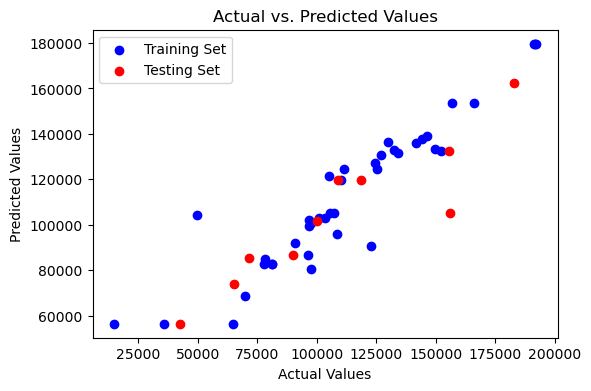

In [132]:
plt.figure(figsize=(6, 4))
# Training set
plt.scatter(y_train, knn_regressor.predict(x_train), color='blue', label='Training Set')
# Testing set
plt.scatter(y_test, pred, color='red', label='Testing Set')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [123]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=10)

In [147]:
y_pred_gb = gb_regressor.predict(x_test)
y_pred_gb

array([ 96885.23190283, 101617.52362146,  81539.03870621,  77641.6502164 ,
        30323.02551584, 107469.79979651, 176279.22594497,  93575.84445945,
       151825.82520546, 142009.47820999])

In [125]:
gb_MAE=mean_absolute_error(y_test,y_pred_gb)
gb_MSE=mean_squared_error(y_test,y_pred_gb)
gb_RMSE=np.sqrt(gb_MSE)
gb_R2 =r2_score(y_test,y_pred_gb)
print(gb_MAE,'\n',gb_RMSE,'\n',gb_R2)

9079.967807177283 
 9865.117028604214 
 0.9463553017221792


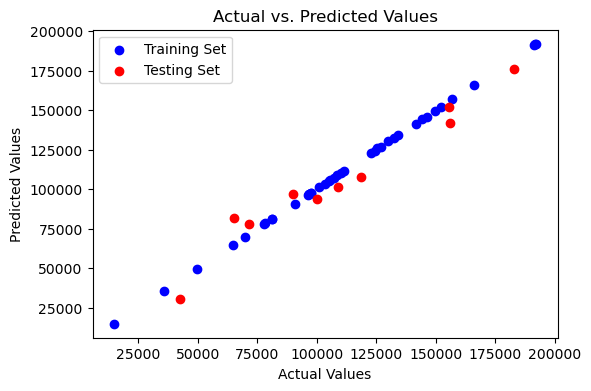

In [126]:
plt.figure(figsize=(6, 4))
# Training set
plt.scatter(y_train, gb_regressor.predict(x_train), color='blue', label='Training Set')
# Testing set
plt.scatter(y_test, y_pred_gb, color='red', label='Testing Set')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()